In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data = train_data.set_index('PassengerId')
test_data = test_data.set_index('PassengerId')

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
train_data[train_data['Sex'] == 'female']['Age'].median()

27.0

In [7]:
train_data[train_data['Sex'] == 'male']['Age'].median()

29.0

In [8]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [10]:
train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [11]:
train_data[['Survived','Pclass']].head()
train_data[['Survived','Pclass']].describe()

,Survived,Pclass
count,891.000000,891.000000
mean,0.383838,2.308642
std,0.486592,0.836071
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,3.000000
75%,1.000000,3.000000
max,1.000000,3.000000


In [12]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [13]:
train_data['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [14]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [16]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [17]:
cat_pipeline = Pipeline([
    ('ordinal_encoder', OrdinalEncoder()),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OneHotEncoder(sparse_output = False)),
])

In [18]:
from sklearn.compose import ColumnTransformer

num_attribs = ['Age','SibSp','Parch','Fare']
cat_attribs = ['Pclass','Sex','Embarked']

preprocess_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
])

In [38]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[-0.56573646,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66386103,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [20]:
y_train = train_data['Survived']

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [25]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = forest_clf.predict(X_test)

In [24]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_clf,X_train,y_train, cv = 10)
forest_scores.mean()

0.8092759051186016

In [26]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto')
svm_scores = cross_val_score(svm_clf,X_train,y_train, cv=10)
svm_scores.mean()

0.8249313358302123

In [28]:
!pip install xgboost

In [30]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_scores = cross_val_score(xgb_clf,X_train,y_train,cv=10)
xgb_scores.mean()

0.8204494382022472

In [34]:
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [35]:
X_test_preprocessed = preprocess_pipeline.transform(test_data)
y_pred = xgb_clf.predict(X_test_preprocessed)

In [40]:
submission = pd.DataFrame({
    'PassengerId':test_data.index,
    'Survived': y_pred
})
submission.to_csv('submission.csv',index=False)

In [32]:
import matplotlib.pyplot as plt

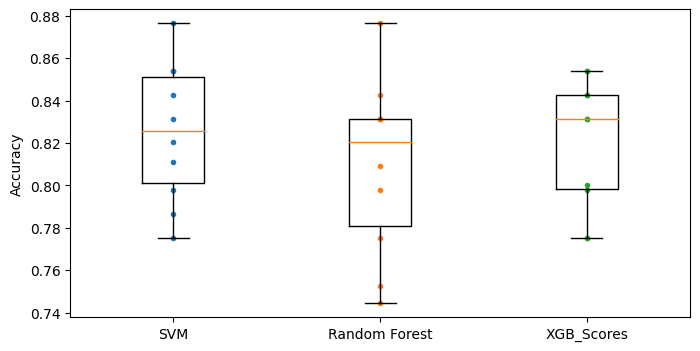

In [33]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.plot([3]*10, xgb_scores, ".")
plt.boxplot([svm_scores, forest_scores, xgb_scores], labels=("SVM", "Random Forest",'XGB_Scores'))
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# train_data['AgeBucket'] = train_data['Age'] // 15 * 15
# train_data[['AgeBucket','Survived']].groupby(['AgeBucket']).mean()

In [ ]:
# train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
# train_data[["RelativesOnboard", "Survived"]].groupby(
#     ['RelativesOnboard']).mean()

In [ ]:
# train_data['AgeBucket'] = pd.cut(train_data['Age'],
#                               bins=[0,12,19,35,60,80],
#                               labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])
# test_data['AgeBucket'] = pd.cut(train_data['Age'],
#                               bins=[0,12,19,35,60,80],
#                               labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])

In [ ]:
# train_data['CabinLetter'] = train_data['Cabin'].fillna('U').str[0]
# test_data['CabinLetter'] = train_data['Cabin'].fillna('U').str[0]

In [ ]:
# train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
# test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# train_data['IsAlone'] = (train_data['FamilySize'] == 1).astype(int)
# test_data['IsAlone'] = (test_data['FamilySize'] == 1).astype(int)

# train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# for df in [train_data, test_data]:
#     df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 
#                                        'Don', 'Dr', 'Major', 'Rev', 
#                                        'Sir', 'Jonkheer', 'Dona'], 'Rare')
#     df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

In [ ]:
# from sklearn.compose import ColumnTransformer


# num_attribs = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']
# cat_attribs = ['Pclass', 'Sex', 'Embarked', 'Title', 'CabinLetter', 'AgeBucket']


# preprocess_pipeline = ColumnTransformer([
#     ('num', num_pipeline, num_attribs),
#     ('cat', cat_pipeline, cat_attribs),
# ])

In [ ]:
# # Correcting the import for Logistic Regression
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.model_selection import cross_val_score

# # Define the target variable from the training data
# y_train = train_data['Survived']

# # Apply your final preprocessing pipeline to the datasets
# # Use fit_transform on the training data to learn the scaling and encoding
# X_train = preprocess_pipeline.fit_transform(train_data)

# # Use just transform on the test data to apply the learned transformations
# X_test = preprocess_pipeline.transform(test_data)

# print("Data preparation is complete. X_train and X_test are ready.")

In [ ]:
# from sklearn.linear_model import LogisticRegression
# log_reg = LogisticRegression(random_state=42, max_iter=1000)
# log_scores = cross_val_score(log_reg,X_train,y_train,cv=10)
